In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [36]:
# Load and preprocess dataset
results = {}
file_path = 'datasets/dataset_1.csv'
data = pd.read_csv(file_path)

data.drop(columns=['UDI', 'Product ID'], inplace=True, errors='ignore')

data['Failure'] = data['Failure Type'].apply(lambda x: 0 if x == 'No Failure' else 1)
data.drop(columns=['Failure Type'], inplace=True)
data = pd.get_dummies(data, columns=['Type'], drop_first=True)

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('Failure')
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

X = data.drop(columns=['Failure'])
y = data['Failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Sample:\n", X_train.head())
print("Training Labels Distribution:\n", y_train.value_counts())

Training Data Sample:
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
9254            -0.852397                -0.610355                0.430756   
1561            -0.902393                -1.082162               -0.841032   
1670            -0.902393                -1.486567               -0.060109   
6087             0.447499                 0.535460                0.335930   
6669             0.697480                 0.333257                0.179746   

      Torque [Nm]  Tool wear [min]    Target  Type_L  Type_M  
9254    -0.891505         1.367599 -0.187322    True   False  
1561     1.385683         0.456380 -0.187322    True   False  
1670    -0.891505         1.351888 -0.187322    True   False  
6087    -0.700903        -1.586009 -0.187322   False    True  
6669    -0.610618         1.571838 -0.187322    True   False  
Training Labels Distribution:
 Failure
0    7717
1     283
Name: count, dtype: int64


In [37]:
# Function to train and evaluate a model
results = {}
def train_and_evaluate_model(model, model_name):
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    # Calculate metrics
    results[model_name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }

    print(f"{model_name} Accuracy: {results[model_name]['accuracy']}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"Classification Report for {model_name}:\n", report)
    print("-" * 80)

In [38]:
def plot_model_performance(results):
    """
    Create a comprehensive bar plot to visualize model performance metrics.
    
    Parameters:
    - results: Dictionary of performance metrics for each model
    """
    plt.figure(figsize=(12, 6))
    
    # Prepare data for plotting
    models = list(results.keys())
    metrics = ['accuracy', 'precision', 'recall', 'f1_score']
    
    # Set up bar positions
    x = np.arange(len(models))
    width = 0.2
    
    # Plot each metric
    for i, metric in enumerate(metrics):
        metric_values = [results[model][metric] for model in models]
        plt.bar(x + i*width, metric_values, width, label=metric.capitalize())
    
    # Customize the plot
    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.title('Model Performance Comparison', fontsize=14)
    plt.xticks(x + width*1.5, models, rotation=45)
    plt.ylim(0, 1)  # Metrics are typically between 0 and 1
    plt.legend(loc='lower right')
    plt.tight_layout()
    
    # Add value labels on top of each bar
    for i, metric in enumerate(metrics):
        metric_values = [results[model][metric] for model in models]
        for j, v in enumerate(metric_values):
            plt.text(j + i*width, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)
    
    plt.show()

In [39]:
#SVM model
svm_model = SVC(kernel='rbf', random_state=42, class_weight='balanced')
train_and_evaluate_model(svm_model, "SVM")

Training SVM...
SVM Accuracy: 0.9935
Confusion Matrix:
 [[1928    7]
 [   6   59]]
Classification Report for SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.89      0.91      0.90        65

    accuracy                           0.99      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.99      0.99      0.99      2000

--------------------------------------------------------------------------------


In [40]:
# ANN
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
train_and_evaluate_model(ann_model, "ANN")

Training ANN...
ANN Accuracy: 0.996
Confusion Matrix:
 [[1933    2]
 [   6   59]]
Classification Report for ANN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.97      0.91      0.94        65

    accuracy                           1.00      2000
   macro avg       0.98      0.95      0.97      2000
weighted avg       1.00      1.00      1.00      2000

--------------------------------------------------------------------------------


In [41]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
train_and_evaluate_model(rf_model, "Random Forest")

Training Random Forest...
Random Forest Accuracy: 0.996
Confusion Matrix:
 [[1933    2]
 [   6   59]]
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.97      0.91      0.94        65

    accuracy                           1.00      2000
   macro avg       0.98      0.95      0.97      2000
weighted avg       1.00      1.00      1.00      2000

--------------------------------------------------------------------------------


In [42]:
# Naive Bayes
nb_model = GaussianNB()
train_and_evaluate_model(nb_model, "Naive Bayes")

Training Naive Bayes...
Naive Bayes Accuracy: 0.9955
Confusion Matrix:
 [[1932    3]
 [   6   59]]
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.95      0.91      0.93        65

    accuracy                           1.00      2000
   macro avg       0.97      0.95      0.96      2000
weighted avg       1.00      1.00      1.00      2000

--------------------------------------------------------------------------------


In [43]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_model(knn_model, "KNN")

Training KNN...
KNN Accuracy: 0.996
Confusion Matrix:
 [[1933    2]
 [   6   59]]
Classification Report for KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       0.97      0.91      0.94        65

    accuracy                           1.00      2000
   macro avg       0.98      0.95      0.97      2000
weighted avg       1.00      1.00      1.00      2000

--------------------------------------------------------------------------------


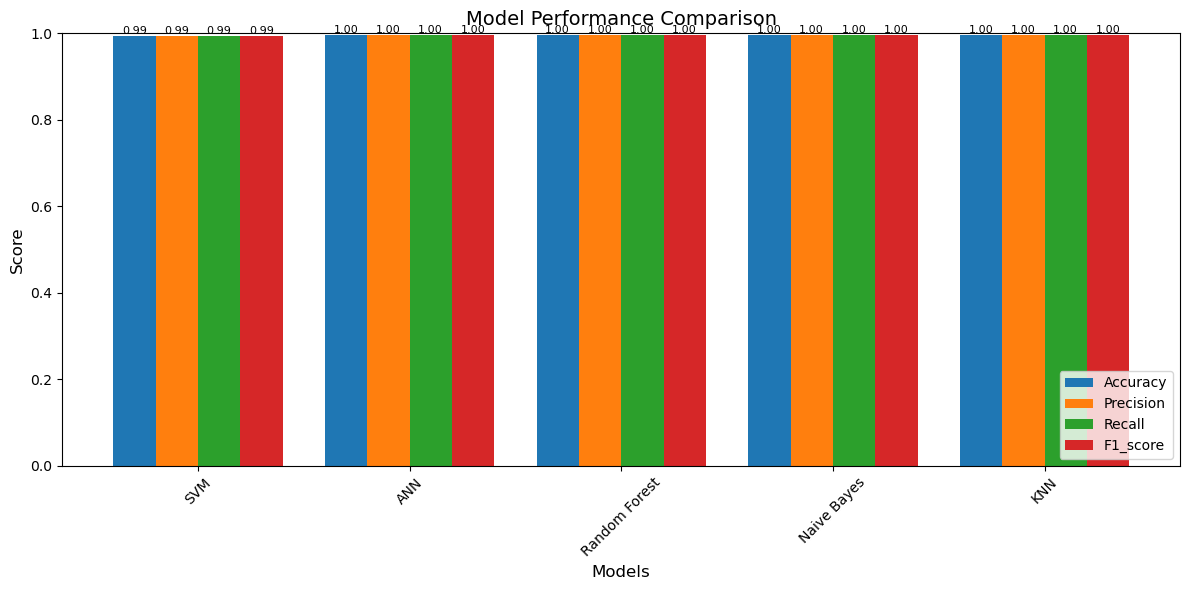

In [44]:
plot_model_performance(results)